In [1]:
##### from pygradu import gridify
from pygradu import shortest_path
from pygradu import gridify
from pygradu import portcalls

import shapely.geometry
import pandas as pd
import numpy as np
import importlib

RESULTS_DIR = 'data/results/'
DATASET_DIR = 'data/datasets/'
SHAPES_DIR = 'data/shapes/'

importlib.reload(gridify)

grid_2500m = gridify.area_to_grid(side_length=2500)
grid_5km = gridify.area_to_grid(side_length=5000)

validation_voyages_summer = pd.read_csv(DATASET_DIR + 'validation_set_summer.csv', index_col=0, parse_dates = ['timestamp', 'ata', 'atd'])
validation_voyages_winter = pd.read_csv(DATASET_DIR + 'validation_set_winter.csv', index_col=0, parse_dates = ['timestamp', 'ata', 'atd'])


Original NE: POINT (31.5 66.8)
Original SW: POINT (8.5 53)
Transformed NE: (697681.2863658136, 7416224.9393330095)
Transformed SW: (-735260.4063631196, 6033964.466017238)
col_count 573
row_count 552
grid_size 316296
Original NE: POINT (31.5 66.8)
Original SW: POINT (8.5 53)
Transformed NE: (697681.2863658136, 7416224.9393330095)
Transformed SW: (-735260.4063631196, 6033964.466017238)
col_count 286
row_count 276
grid_size 78936


In [2]:
import json
from shapely.geometry import shape, Point
# depending on your version, use: from shapely.geometry import shape, Point

# load GeoJSON file containing sectors
with open(SHAPES_DIR + 'sea_areas.geojson') as f:
    sea_areas = json.load(f)

def get_sea_area_from_latlon(sea_areas, lat, lon):
    point = Point(lon, lat)
    # check each polygon to see if it contains the point
    for feature in sea_areas['features']:
        polygon = shape(feature['geometry'])
        if polygon.contains(point):
            return feature['properties']['id']
    return -1

def get_sea_area_name_from_latlon(sea_areas, lat, lon):
    point = Point(lon, lat)
    # check each polygon to see if it contains the point
    for feature in sea_areas['features']:
        polygon = shape(feature['geometry'])
        if polygon.contains(point):
            return feature['properties']['name']
    return 'South'

def get_sea_area_name(sea_areas, _id):
    # check each polygon to see if it contains the point
    for feature in sea_areas['features']:
        polygon = shape(feature['geometry'])
        if int(feature['properties']['id']) == int(_id):
            return feature['properties']['name']
    return 'South'

In [5]:
ports = pd.read_csv(DATASET_DIR + 'ports.csv')
ports = ports[['port_id', 'lat', 'lon']]
print(len(ports))

ais_ports = pd.read_csv(DATASET_DIR + 'ports_calculated_from_ais.csv')
ais_ports = ais_ports[['id', 'lat', 'lon']]
ais_ports.columns=['port_id', 'lat', 'lon']

ports = ports.append(ais_ports)

157


In [6]:
summer_results_5km_adj = pd.read_csv(RESULTS_DIR + 'summer_results_5km_adj_to_end.csv', index_col=0, parse_dates = ['start_time', 'pred_time'])
summer_results_5km_ship = pd.read_csv(RESULTS_DIR + 'summer_results_5km_ship_to_end.csv', index_col=0, parse_dates = ['start_time', 'pred_time'])
summer_results_2500m_adj = pd.read_csv(RESULTS_DIR + 'summer_results_2500m_adj_to_end.csv', index_col=0, parse_dates = ['start_time', 'pred_time'])

winter_results_5km_adj_no_dirway = pd.read_csv(RESULTS_DIR + 'winter_results_to_end_5km_adj_no_dirways.csv', index_col=0, parse_dates = ['start_time', 'pred_time'])
winter_results_5km_adj_dirway = pd.read_csv(RESULTS_DIR + 'winter_results_to_end_5km_adj_dirways.csv', index_col=0, parse_dates = ['start_time', 'pred_time'])
winter_results_5km_ship_no_dirway = pd.read_csv(RESULTS_DIR + 'winter_results_5km_ship_to_end_no_dirways.csv', index_col=0, parse_dates = ['start_time', 'pred_time'])
winter_results_5km_ship_dirway = pd.read_csv(RESULTS_DIR + 'winter_results_5km_ship_to_end_dirways.csv', index_col=0, parse_dates = ['start_time', 'pred_time'])
winter_results_2500m_adj_no_dirway = pd.read_csv(RESULTS_DIR + 'winter_results_2500m_ship_to_end_no_dirways.csv', index_col=0, parse_dates = ['start_time', 'pred_time'])
winter_results_2500m_adj_dirway = pd.read_csv(RESULTS_DIR + 'winter_results_2500m_ship_to_end_dirways.csv', index_col=0, parse_dates = ['start_time', 'pred_time'])
summer_results_5km_adj.head()

,voyage,vessel_type,end_port,end_port_sea_area,start_time,pred_time,mins_to_future,actual_lat,actual_lon,pred_lat,pred_lon,actual_speed,pred_speed,acc_distance_nm,error_rate_lat,error_rate_lon,error_rate_speed,correct_node
0,14,GC,19942,-1,2019-06-07 11:27:49,2019-06-07 11:27:49,0.000000,53.974982,11.340805,53.974982,11.340805,4.63,4.649501,3.819239e-13,1.316430e-14,0.000000,0.421189,1
1,14,GC,19942,-1,2019-06-07 11:27:49,2019-06-07 11:35:43,7.900000,53.992868,11.331420,53.992051,11.357935,4.63,4.649501,9.371762e-01,1.513326e-03,0.233991,0.421189,1
2,14,GC,19942,-1,2019-06-07 11:27:49,2019-06-07 11:41:43,13.900000,54.007890,11.331562,54.005014,11.370954,4.63,4.649501,1.400651e+00,5.325419e-03,0.347631,0.421189,1
3,14,GC,19942,-1,2019-06-07 11:27:49,2019-06-07 11:47:53,20.066667,54.018665,11.345753,54.018335,11.384343,4.42,4.649501,1.361401e+00,6.107745e-04,0.340124,5.192332,0
4,14,GC,19942,-1,2019-06-07 11:27:49,2019-06-07 11:52:59,25.166667,54.020092,11.367012,54.029351,11.395423,4.53,4.649501,1.145939e+00,1.714044e-02,0.249943,2.637993,0


In [7]:
importlib.reload(portcalls)

%time voyages_summer_lengths = portcalls.get_voyage_lengths(validation_voyages_summer)
%time voyages_winter_lengths = portcalls.get_voyage_lengths(validation_voyages_winter)
voyages_summer_lengths.head()

CPU times: user 21.7 s, sys: 63.3 ms, total: 21.8 s
Wall time: 21.8 s
CPU times: user 11.2 s, sys: 30.9 ms, total: 11.2 s
Wall time: 11.2 s


,voyage,voyage_length,start_end_length,difference,travel_time,avg_speed
0,14,393.001082,331.910305,18.405809,1366.066667,4.801574
1,67,509.627510,457.719607,11.340546,1442.483333,5.888805
2,88,612.745803,438.626106,39.696611,1723.316667,5.917536
3,93,1330.034728,1137.075860,16.969745,3856.666667,5.751125
4,94,842.476910,616.033928,36.758200,2349.216667,5.984929


In [8]:
importlib.reload(portcalls)

voyages_summer = summer_results_5km_adj[['voyage', 'vessel_type', 'end_port', 'end_port_sea_area', 'start_time']].drop_duplicates()
voyages_summer['start_lat'] = voyages_summer.apply(lambda row: summer_results_5km_adj[summer_results_5km_adj.voyage == row.voyage].head(1).iloc[0].actual_lat, axis=1)
voyages_summer['start_lon'] = voyages_summer.apply(lambda row: summer_results_5km_adj[summer_results_5km_adj.voyage == row.voyage].head(1).iloc[0].actual_lon, axis=1)
voyages_summer['start_sea_area'] = voyages_summer.apply(lambda row: get_sea_area_from_latlon(sea_areas, row.start_lat, row.start_lon), axis=1)
voyages_summer['start_port'] = voyages_summer.apply(lambda row: portcalls.get_port_id(row, ports), axis=1)

In [9]:
importlib.reload(portcalls)

voyages_winter = winter_results_5km_adj_no_dirway[['voyage', 'vessel_type', 'end_port', 'end_port_sea_area', 'start_time']].drop_duplicates()
voyages_winter['start_lat'] = voyages_winter.apply(lambda row: winter_results_5km_adj_no_dirway[winter_results_5km_adj_no_dirway.voyage == row.voyage].head(1).iloc[0].actual_lat, axis=1)
voyages_winter['start_lon'] = voyages_winter.apply(lambda row: winter_results_5km_adj_no_dirway[winter_results_5km_adj_no_dirway.voyage == row.voyage].head(1).iloc[0].actual_lon, axis=1)
voyages_winter['start_sea_area'] = voyages_winter.apply(lambda row: get_sea_area_from_latlon(sea_areas, row.start_lat, row.start_lon), axis=1)
voyages_winter['start_port'] = voyages_summer.apply(lambda row: portcalls.get_port_id(row, ports), axis=1)

## Summer results by sea areas

In [12]:
summer_results_5km_ship['speed_diff'] = abs(summer_results_5km_ship['actual_speed'] - summer_results_5km_ship['pred_speed'])
winter_results_5km_ship_no_dirway['speed_diff'] = abs(winter_results_5km_ship_no_dirway['actual_speed'] - winter_results_5km_ship_no_dirway['pred_speed'])
winter_results_5km_ship_dirway['speed_diff'] = abs(winter_results_5km_ship_dirway['actual_speed'] - winter_results_5km_ship_dirway['pred_speed'])

In [13]:
summer_results_5km_ship.speed_diff.describe()

count    71399.000000
mean         0.908226
std          0.918529
min          0.000043
25%          0.321938
50%          0.679479
75%          1.230140
max         10.580000
Name: speed_diff, dtype: float64

In [14]:
winter_results_5km_ship_no_dirway.speed_diff.describe()

count    37144.000000
mean         0.960745
std          0.967622
min          0.000000
25%          0.319199
50%          0.711657
75%          1.336714
max          8.069000
Name: speed_diff, dtype: float64

In [15]:
winter_results_5km_ship_dirway.speed_diff.describe()

count    37867.000000
mean         0.995967
std          1.008669
min          0.000047
25%          0.330271
50%          0.720893
75%          1.365304
max          7.656451
Name: speed_diff, dtype: float64

In [16]:
import matplotlib.pyplot as plt

def plot_intervals(results, col_x, col_y, interval):
    bins = []
    labels = []

    i = 0
    while i < results[col_x].max():
        bins.append(i)
        labels.append(int(i))
        i += interval
    del labels[0]

    results['interval'] = pd.cut(results[col_x], bins=bins, labels=labels)

    x = []
    y = []

    for group, voyage_results in results.groupby('interval'):
        if(len(voyage_results)) < 5:
            continue
        y.append(voyage_results[col_y].median())
        if np.isnan(group):
            group = 0
        x.append(group/60)
        
    return x, y

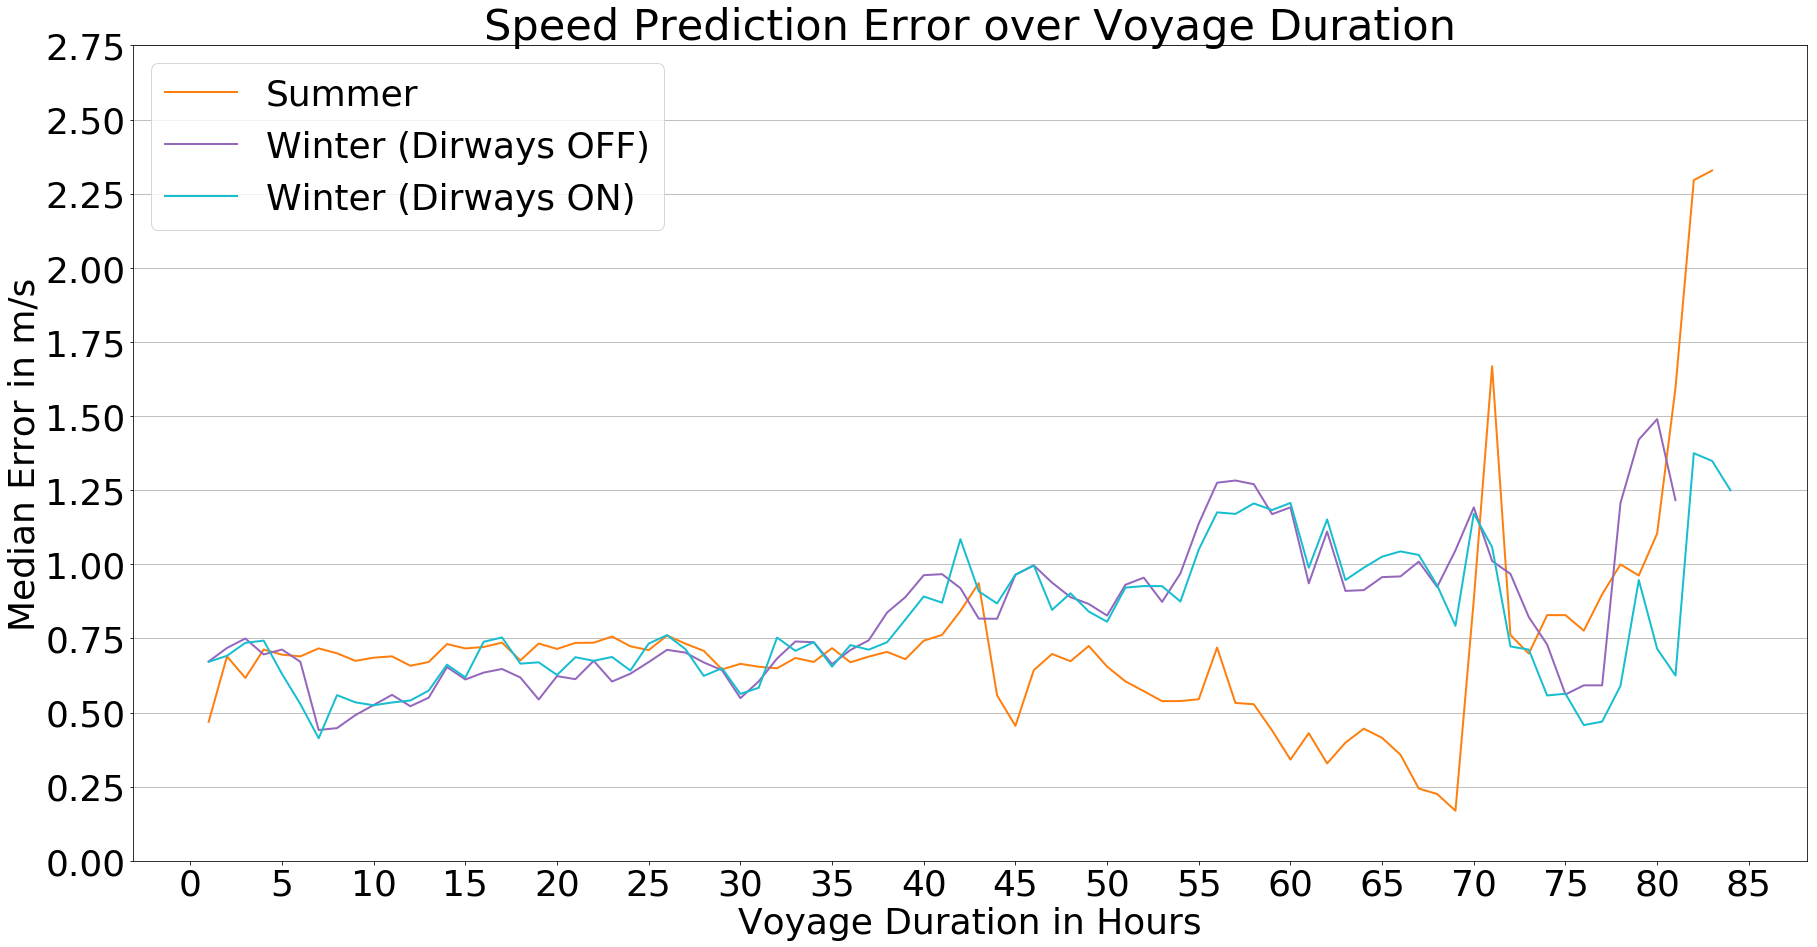

In [17]:
from scipy.interpolate import make_interp_spline, BSpline



fig = plt.figure(figsize=(30,15))
plt.rcParams.update({'font.size': 36})

x, y = plot_intervals(summer_results_5km_ship,'mins_to_future', 'speed_diff', 60)
plt.plot(x, y, alpha=1, linewidth=2, c='tab:orange', label='Summer')

x, y = plot_intervals(winter_results_5km_ship_no_dirway,'mins_to_future', 'speed_diff', 60)
plt.plot(x, y, alpha=1, linewidth=2, c='tab:purple', label='Winter (Dirways OFF)')

x, y = plot_intervals(winter_results_5km_ship_dirway,'mins_to_future', 'speed_diff', 60)
plt.plot(x, y, alpha=1, linewidth=2, c='tab:cyan', label='Winter (Dirways ON)')


plt.xticks(np.arange(0, 90, 5)) 
plt.yticks(np.arange(0, 3, 0.25))
plt.grid(axis='y', alpha=1)

plt.title(f"Speed Prediction Error over Voyage Duration")
plt.ylabel("Median Error in m/s")
plt.xlabel("Voyage Duration in Hours")
handles, labels = plt.gca().get_legend_handles_labels()
newLabels, newHandles = [], []
for handle, label in zip(handles, labels):
  if label not in newLabels:
    newLabels.append(label)
    newHandles.append(handle)
plt.legend(newHandles, newLabels)
plt.show()


#### Actual Speed Compared to the Predicted Speed over Time

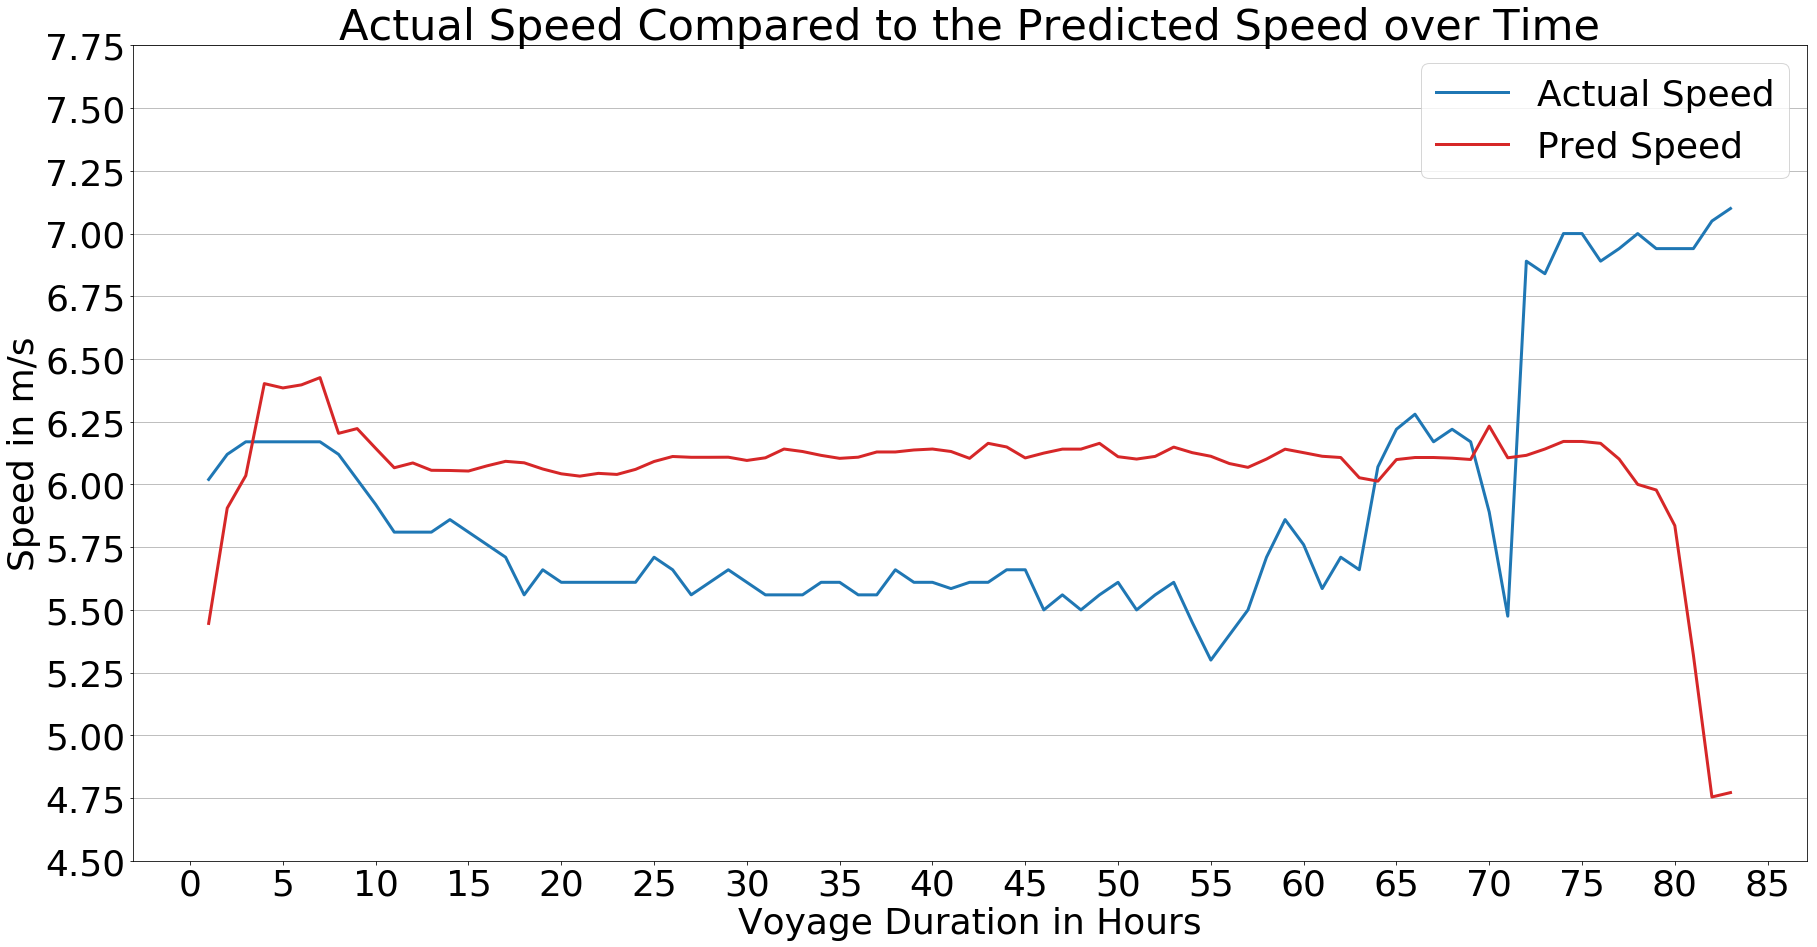

In [18]:
from scipy.interpolate import make_interp_spline, BSpline



fig = plt.figure(figsize=(30,15))
plt.rcParams.update({'font.size': 36})

x, y = plot_intervals(summer_results_5km_ship,'mins_to_future', 'actual_speed', 60)
plt.plot(x, y, alpha=1, linewidth=3, c='tab:blue', label='Actual Speed')

x, y = plot_intervals(summer_results_5km_ship,'mins_to_future', 'pred_speed', 60)
plt.plot(x, y, alpha=1, linewidth=3, c='tab:red', label='Pred Speed')


plt.xticks(np.arange(0, 90, 5)) 
plt.yticks(np.arange(4.5, 8, 0.25))
plt.grid(axis='y', alpha=1)

plt.title(f"Actual Speed Compared to the Predicted Speed over Time")
plt.ylabel("Speed in m/s")
plt.xlabel("Voyage Duration in Hours")
handles, labels = plt.gca().get_legend_handles_labels()
newLabels, newHandles = [], []
for handle, label in zip(handles, labels):
  if label not in newLabels:
    newLabels.append(label)
    newHandles.append(handle)
plt.legend(newHandles, newLabels)
plt.show()


In [24]:
summer_results_5km_ship['in_sea_area'] = summer_results_5km_ship.apply(lambda row: get_sea_area_from_latlon(sea_areas, row.actual_lat, row.actual_lon), axis=1)
winter_results_5km_ship_dirway['in_sea_area'] = winter_results_5km_ship_dirway.apply(lambda row: get_sea_area_from_latlon(sea_areas, row.actual_lat, row.actual_lon), axis=1)
winter_results_5km_ship_no_dirway['in_sea_area'] = winter_results_5km_ship_no_dirway.apply(lambda row: get_sea_area_from_latlon(sea_areas, row.actual_lat, row.actual_lon), axis=1)


#### Exam speed results by sea areas

In [21]:
sea_area_ids = []
for feature in sea_areas['features']:
    sea_area_ids.append(feature['properties']['id'])

def calculate_speed_results(route_results, voyage_lengts):
    
    sea_area_accuracies = []
    for sea_area in sea_area_ids:
        if(sea_area == -1):
            continue
        voyage_in_sea_areas = route_results[route_results.in_sea_area == sea_area][['voyage', 'in_sea_area']].drop_duplicates()
        sea_area_results = route_results[route_results.voyage.isin(voyage_in_sea_areas.voyage.values)]
        voyage_lengths = voyage_lengts[voyage_lengts.voyage.isin(sea_area_results.voyage.drop_duplicates().values)].voyage_length
        sea_area_accuracies.append([sea_area, sea_area_results.median().speed_diff, sea_area_results.mean().speed_diff, sea_area_results.std().speed_diff, len(sea_area_results)])

    sea_area_accuracies = pd.DataFrame(data=sea_area_accuracies, columns=['sea_area', 'median_speed_diff', 'mean_speed_diff', 'std_speed_diff', 'count'])
    sea_area_accuracies['sea_area_name'] = sea_area_accuracies.apply(lambda row: get_sea_area_name(sea_areas, row.sea_area), axis=1)
    sea_area_accuracies = sea_area_accuracies[['sea_area_name', 'median_speed_diff', 'mean_speed_diff', 'std_speed_diff', 'count']].sort_values(by='median_speed_diff')
    return sea_area_accuracies

In [26]:
calculate_speed_results(summer_results_5km_ship, voyages_summer_lengths)

,sea_area_name,median_speed_diff,mean_speed_diff,std_speed_diff,count
9,Saimaa,0.504999,0.799475,0.820255,2224
0,Bothnian Bay,0.571885,0.808483,0.878069,12512
5,Gulf of Riga,0.643623,0.774676,0.654207,8735
7,Gdansk Basin,0.653717,0.912361,1.062656,10718
8,Arkona Basin & Bomholm Basin,0.657076,0.888920,0.911195,29817
1,Bothnian Sea & The Quark,0.661403,0.894093,0.920342,29048
6,Gotland Basin,0.670956,0.890441,0.920893,46673
3,Gulf of Finland,0.688888,0.858340,0.781711,20386
4,Northern Baltic Proper,0.689881,0.900852,0.922465,45162
2,Åland Sea,0.699553,0.887564,0.856049,35624


In [27]:
calculate_speed_results(winter_results_5km_ship_dirway, voyages_winter_lengths)

,sea_area_name,median_speed_diff,mean_speed_diff,std_speed_diff,count
5,Gulf of Riga,0.492187,0.659395,0.837773,1748
3,Gulf of Finland,0.559759,0.694605,0.712903,2230
0,Bothnian Bay,0.706280,0.984305,1.004965,37050
1,Bothnian Sea & The Quark,0.719175,0.974870,0.966700,36713
4,Northern Baltic Proper,0.730000,0.968739,0.932808,32122
2,Åland Sea,0.731205,0.969779,0.933848,33104
6,Gotland Basin,0.755992,0.994456,0.952591,29912
8,Arkona Basin & Bomholm Basin,0.859546,1.069966,0.986762,23615
7,Gdansk Basin,NaN,NaN,NaN,0
9,Saimaa,NaN,NaN,NaN,0


In [28]:
calculate_speed_results(winter_results_5km_ship_no_dirway, voyages_winter_lengths)

,sea_area_name,median_speed_diff,mean_speed_diff,std_speed_diff,count
3,Gulf of Finland,0.499506,0.655485,0.697886,2221
5,Gulf of Riga,0.505503,0.591854,0.503067,1133
0,Bothnian Bay,0.692557,0.947412,0.962065,36361
1,Bothnian Sea & The Quark,0.707671,0.942833,0.932860,36039
4,Northern Baltic Proper,0.724396,0.945098,0.913398,31707
2,Åland Sea,0.725171,0.945825,0.913872,32678
6,Gotland Basin,0.741089,0.968339,0.937142,28998
8,Arkona Basin & Bomholm Basin,0.848528,1.042114,0.963906,23332
7,Gdansk Basin,NaN,NaN,NaN,0
9,Saimaa,NaN,NaN,NaN,0
